We are going to do a1+b1 and a2+b2.
1 + 2 = 3
2 + 3 = 5


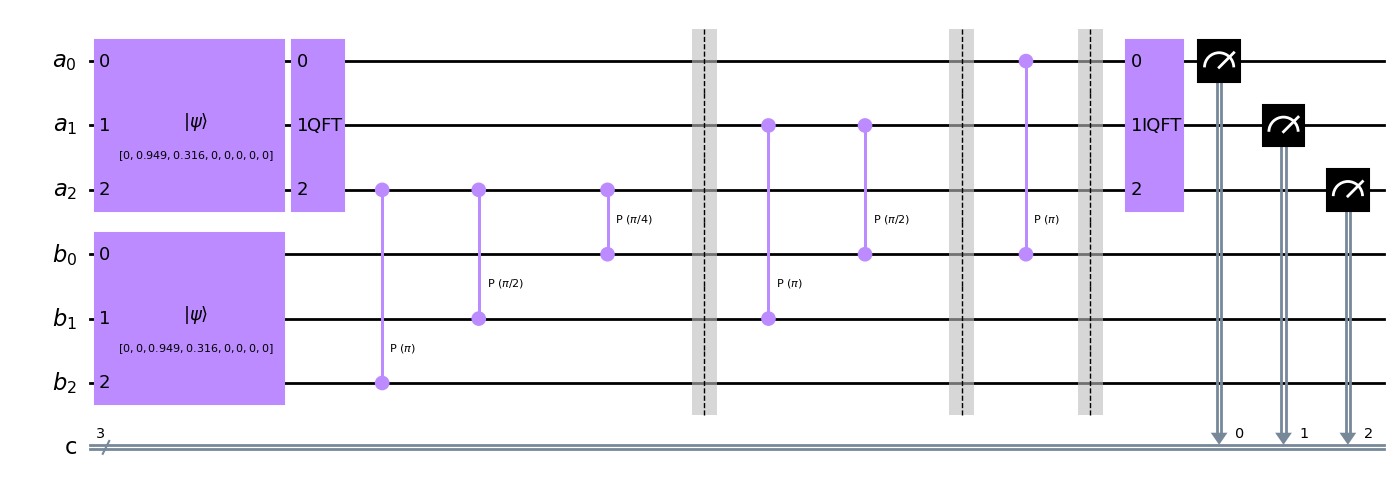

In [9]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer
from qiskit.circuit.library import QFT
import numpy as np

simulator = Aer.get_backend('aer_simulator')

def inpt() :
    while True:
        try:
            print('We are going to do a1+b1 and a2+b2.')
            ns = [bin(int(n)).replace('0b', '') for n in input(f"Give input in the form 'a1 b1 a2 b2': ").split(' ')]
            d = max([len(n) for n in ns])
            ns = [n.zfill(d) for n in ns]
            if len(ns) == 4: break
            else : raise Exception
            
        except:
            print("Invalid input. Please try again!")

    return ns, d


def initCirc(ns, ln) :
    a = QuantumRegister(ln, 'a')
    b = QuantumRegister(ln, 'b')
    c = ClassicalRegister(ln, 'c')
    qc = QuantumCircuit(a, b, c)

    ln = 2**(ln)
    sa = np.zeros(ln) ; sb = np.zeros(ln)
    sa[int(ns[0], 2)] = np.sqrt(0.9) ; sb[int(ns[1], 2)] = np.sqrt(0.9)
    sa[int(ns[2], 2)] = np.sqrt(0.1) ; sb[int(ns[3], 2)] = np.sqrt(0.1)

    qc.initialize(sa, a)
    qc.initialize(sb, b)
    
    return a, b, qc


def calc(ns, ln):
    ln = ln+1
    a, b, qc = initCirc(ns, ln)

    qc.append(QFT(ln, do_swaps=False), range(ln))

    qc = addPhase(a, b, ln, np.pi, qc)

    qc.append(QFT(ln, do_swaps=False, inverse=True), range(ln))

    qc.measure(range(ln), range(ln))
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    counts = job.result().get_counts(compiled_circuit)
    
    r1, r2 = max(counts, key=counts.get), min(counts, key=counts.get)

    return r1, r2, qc


def addPhase(a, b, ln, pie, qc) :

    for i in range(ln-1, -1, -1) :
        for j in range(i+1) :
            qc.cp(pie/2**j, b[i-j], a[i])
        qc.barrier()
    
    return qc


opr = '+'

ns, ln = inpt()
r1, r2, qc = calc(ns, ln)
print(f"{int(ns[0], 2)} {opr} {int(ns[1], 2)} = {int(r1, 2)}")
print(f"{int(ns[2], 2)} {opr} {int(ns[3], 2)} = {int(r2, 2)}")
qc.draw('mpl', filename='superposition_adder.svg')

# Other attempts

{'11': 464, '00': 536}


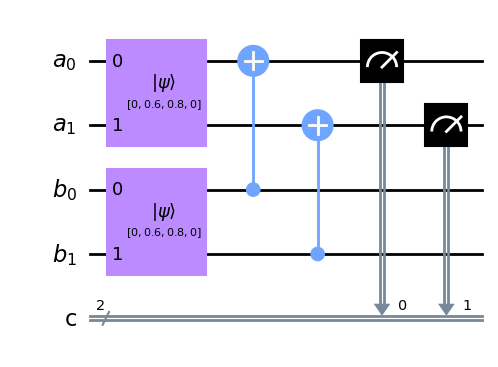

In [2]:
from qiskit import BasicAer, execute, QuantumCircuit, ClassicalRegister, QuantumRegister
import numpy as np

l = 2

a = QuantumRegister(l, 'a')
b = QuantumRegister(l, 'b')
c = ClassicalRegister(l, 'c')
qc = QuantumCircuit(a, b, c)

qc.initialize([0, 0.6, 0.8, 0], a)
qc.initialize([0, 0.6, 0.8, 0], b)

for i in range(l) :
    qc.cx(b[i], a[i])

qc.measure(a, c)
backend = BasicAer.get_backend('qasm_simulator')
results = execute(qc, backend, shots=1000).result().get_counts()
print(results)

display(qc.draw('mpl'))

<IPython.core.display.Latex object>

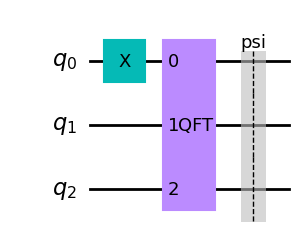

In [12]:
from qiskit import QuantumCircuit, transpile, Aer


simulator = Aer.get_backend('aer_simulator')

n = 3

circuit = QuantumCircuit(n)
circuit.x(0)
circuit.append(QFT(n, do_swaps=False), range(n))
circuit.save_statevector('psi')

result = simulator.run(transpile(circuit, simulator)).result()
data = result.data()

psi = data['psi']

display(psi.draw(output='latex'))
display(circuit.draw('mpl'))

Statevector([ 3.53553391e-01+0.j        , -3.53553391e-01+0.j        ,
              2.16489014e-17+0.35355339j, -2.16489014e-17-0.35355339j,
              2.50000000e-01+0.25j      , -2.50000000e-01-0.25j      ,
             -2.50000000e-01+0.25j      ,  2.50000000e-01-0.25j      ],
            dims=(2, 2, 2))
[1, 2]
State of qubit 0:
 [0.5+0.j 0.5+0.j]
[0, 2]
State of qubit 1:
 [0.5+0.j 0.5+0.j]
[0, 1]
State of qubit 2:
 [0.5+0.j 0.5+0.j]


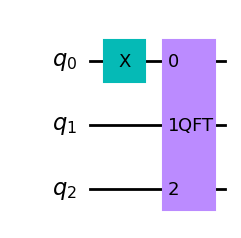

In [46]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import partial_trace, Statevector

# define your two states as circuits
n = 3
circuit = QuantumCircuit(n)
circuit.x(0)
circuit.append(QFT(n, do_swaps=False), range(n))

full_statevector = Statevector(circuit)
print(full_statevector)
tl = np.arange(n)
for i in tl:
    ttl = list(np.delete(tl, np.where(tl == i)))
    print(ttl)
    partial_density_matrix = partial_trace(full_statevector, ttl)
    partial_statevector = np.diagonal(partial_density_matrix)
    print(f'State of qubit {i}:\n', partial_statevector)
# partial_density_matrix = partial_trace(full_statevector, [1, 2])


display(circuit.draw('mpl'))

In [9]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization.state_visualization import _bloch_multivector_data

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)

state = Statevector(qc)
plot_bloch_multivector(state)
print(_bloch_multivector_data(state))

[[0.9999999999999998, 0.0, 0.0], [0.0, 0.0, -0.9999999999999998]]


In [37]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, Aer

def get_state(n, q, circuit, simulator) :
    tl = np.arange(n)
    tm = list(np.delete(tl, np.where(tl == q)))
    circuit.measure(tm, list(range(n-1)))
    circuit.save_statevector('psi')
    result = simulator.run(transpile(circuit, simulator)).result()
    data = result.data()
    psi = data['psi']
    display(psi.draw(output='latex'))
    # for index, instruction in enumerate(circuit.data):
    #     print(index, instruction.operation.name, [ circuit.find_bit(q).index for q in instruction.qubits])
    # print(circuit.data)
    circuit = QuantumCircuit.from_instructions([item for item in circuit.data if item.operation.name != 'measure' and item.operation.name != 'save_statevector'])
    for index, instruction in enumerate(circuit.data):
        print(index, instruction.operation.name, [ circuit.find_bit(q).index for q in instruction.qubits])
    display(circuit.draw('mpl'))
    


simulator = Aer.get_backend('aer_simulator')

n = 3

a = QuantumRegister(n, 'a')
c = ClassicalRegister(n-1, 'c')
circuit = QuantumCircuit(a, c)
circuit.h(0)
circuit.x(1)
# circuit.append(QFT(n, do_swaps=False), range(n))
for q in range(n):
    get_state(n, q, circuit, simulator)


QiskitError: 'No statevector for experiment "<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001EC4C355F90>"'

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

{'q_0': DensityMatrix([[ 0.5+0.j, -0.5+0.j],
               [-0.5+0.j,  0.5+0.j]],
              dims=(2,)), 'q_1': DensityMatrix([[5.00000000e-01+0.j , 2.63784264e-17-0.5j],
               [2.63784264e-17+0.5j, 5.00000000e-01+0.j ]],
              dims=(2,)), 'q_2': DensityMatrix([[0.5       +0.j        , 0.35355339-0.35355339j],
               [0.35355339+0.35355339j, 0.5       +0.j        ]],
              dims=(2,)), 'q_3': DensityMatrix([[0.5       +0.j        , 0.46193977-0.19134172j],
               [0.46193977+0.19134172j, 0.5       +0.j        ]],
              dims=(2,)), 'q_4': DensityMatrix([[0.5       +0.j        , 0.49039264-0.09754516j],
               [0.49039264+0.09754516j, 0.5       +0.j        ]],
              dims=(2,))}


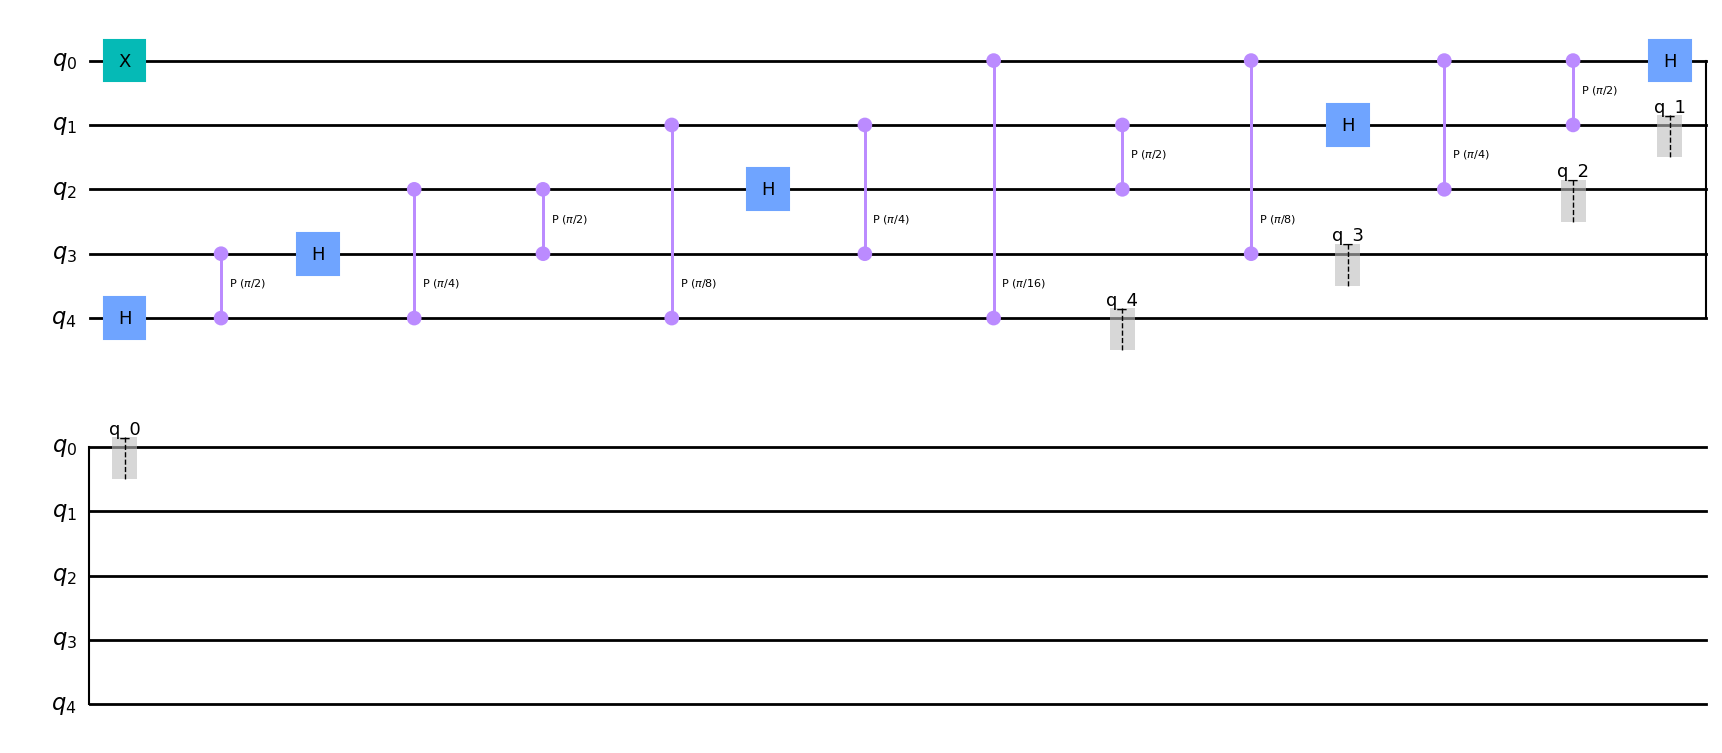

In [78]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, Aer
from qiskit.circuit.library import QFT
from qiskit_aer import AerSimulator

n = 5
simulator = AerSimulator()

circ = QuantumCircuit(5)
circ.x(0)
circ.append(QFT(n, do_swaps=False), range(n))
for q in range(n):
    circ.save_density_matrix(qubits=[q], label=f'q_{q}')

circ = transpile(circ, backend=simulator)
job = simulator.run(circ)
state = job.result().data()
for i,dm in state.items() :
    display(dm.to_statevector().draw('latex'))
    # print(dm)
print(state) #
circ.draw('mpl')